# I. The Machine Learning Landscape

Obligatory introduction course. I'll try to go quick with this part, as the fun stuff happens on later chapters :)

## Setup

Requires Python 3.7 or above.

In [1]:
import sys

assert sys.version_info >= (3, 7)

print(f"Python version: {tuple(sys.version_info)}")


Python version: (3, 10, 4, 'final', 0)


Scikit-Learn ≥ 1.0.1 is required.

In [2]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")
print(f"Scikit-Learn version: {sklearn.__version__}")

Scikit-Learn version: 1.6.1


In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', size=12)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [4]:
import numpy as np

np.random.seed(42)

,Country,GDP per capita (USD),Life satisfaction
0,Russia,26456.387938,5.8
1,Greece,27287.083401,5.4
2,Turkey,28384.987785,5.5
3,Latvia,29932.493910,5.9
4,Hungary,31007.768407,5.6


Prediction for Cyprus using a Linear Regression: [[6.30165767]]
Prediction for Cyprus using a KNN (N = 3): [[6.33333333]]


<Figure size 640x480 with 0 Axes>

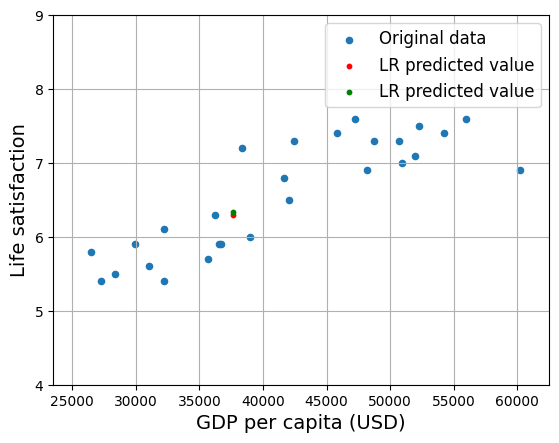

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression


lifesat = pd.read_csv("../data/lifesat/lifesat.csv")

display(lifesat.head())

X = lifesat[["GDP per capita (USD)"]].values
y = lifesat[["Life satisfaction"]].values

# Select a linear model
model_lr = LinearRegression()

# Train the model
model_lr.fit(X, y)

# Make a prediction for Cyprus
X_new = [[37_655.2]]  # Cyprus' GDP per capita in 2020
predicted_lr = model_lr.predict(X_new)
print(f"Prediction for Cyprus using a Linear Regression: {predicted_lr}") # outputs [[6.30165767]]

# Same shit but using KNN instead
from sklearn.neighbors import KNeighborsRegressor

model_knn = KNeighborsRegressor(n_neighbors = 3)
model_knn.fit(X, y)
predicted_knn = model_knn.predict(X_new)
print(f"Prediction for Cyprus using a KNN (N = 3): {predicted_knn}")

plt.figure()
lifesat.plot(kind='scatter', grid=True,
             x="GDP per capita (USD)", y="Life satisfaction", label = "Original data")
plt.scatter(x = X_new, y = predicted_lr, s = 10, c = "r", label = "LR predicted value")
plt.scatter(x = X_new, y = predicted_knn, s = 10, c = "g", label = "LR predicted value")

plt.axis([23_500, 62_500, 4, 9])
plt.legend()
plt.show()